# 葡萄酒数据集

In [2]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('data/wine.data',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 14)

In [8]:
X=data.loc[:,1:13].values.astype(float)
y=data.loc[:,0].values.astype(int)

In [252]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.score(X,y)

1.0

In [253]:
predicted_y = clf.predict(X)
from sklearn import metrics
print(metrics.classification_report(y, predicted_y))
print('Confusion matrix:' )
print( metrics.confusion_matrix(y, predicted_y) )

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        59
          2       1.00      1.00      1.00        71
          3       1.00      1.00      1.00        48

avg / total       1.00      1.00      1.00       178

Confusion matrix:
[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


# 房价

In [254]:
data=pd.read_excel('data/houseprize-sh.xlsx')

data.drop(['编号','户型结构','套内面积','交易属性','小区名称','板块','产权年限','首付(W)', '单价'],inplace=True,axis=1)

In [255]:
x=data['房屋户型'].str.replace('室',' ').str.replace('厅',' ').str.replace('厨',' ').str.replace('卫','')
'''x=x.str.replace('厅',' ')
x=x.str.replace('厨',' ')
x=x.str.replace('卫','')'''
x=x.str.split(' ',expand=True).astype(int)
htcolumns={0:'户型-房间',1:'户型-厅',2:'户型-厨房',3:'户型-卫生'}
x=x.rename(columns=htcolumns)

In [256]:
y=data['建成时间'].str.split('年建',expand=True).drop(1,axis=1)
y=y.rename(columns={0:'建成时间'})

xy=pd.merge(x,y,how='left',left_index=True,right_index=True)

data=data.drop(['房屋户型','建成时间'],axis=1)

ndata=pd.merge(data,xy,how='left',left_index=True,right_index=True)

In [257]:
i=data['所在楼层'].str.split('楼',expand=True)[0]
i.name='所处层数'

In [258]:
j=data['所在楼层'].str.replace('共',' ').str.replace('层',' ').str.split(' ',expand=True)[2].astype(int)
j.name='总楼层'

In [259]:
ij=pd.merge(i,j,how='left',left_index=True,right_index=True)

newdata=pd.merge(ndata,ij,how='left',left_index=True,right_index=True)
newdata=newdata.drop(['所在楼层'],axis=1)

#newdata.head()

In [260]:
newdata.to_excel('SuperHouse.xlsx')

一点微小的工作，清理了一下同学的数据

In [82]:
hdata=pd.read_excel('SuperHouse.xlsx',index_col=0)

In [83]:
hdata.head()

,总价(W),建筑面积(㎡),建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,配备电梯,经纬度,行政区,户型-房间,户型-厅,户型-厨房,户型-卫生,建成时间,所处层数,总楼层
0,275.0,89.00,板楼,南北,砖混结构,精装,一梯两户,无,"121.2535861,31.0347424",松江,2,2,1,1,1999,高,6
1,310.0,75.23,板楼,南,钢混结构,精装,一梯两户,无,"121.3175491,31.24657189",嘉定,2,2,1,1,2005,高,5
2,405.0,129.49,板楼,南,钢混结构,毛坯,一梯两户,无,"121.7264358,31.1604964",浦东,3,2,1,2,2005,高,6
3,370.0,78.00,板楼,南北,砖混结构,简装,一梯四户,无,"121.488126,31.325868",宝山,3,1,1,1,1995,低,6
4,210.0,86.32,板楼,南北,钢混结构,其他,两梯四户,有,"121.129149,31.290665",青浦,2,2,1,1,2010,中,18


In [84]:
hdata=hdata.dropna()

In [85]:
hdata.columns

Index(['总价(W)', '建筑面积(㎡)', '建筑类型', '房屋朝向', '建筑结构', '装修情况', '梯户比例', '配备电梯',
       '经纬度', '行政区', '户型-房间', '户型-厅', '户型-厨房', '户型-卫生', '建成时间', '所处层数', '总楼层'],
      dtype='object')

In [86]:
hdata['建成时间'][hdata['建成时间']=='未知']='2000'
hdata['建成时间']=hdata['建成时间'].astype(int)
hdata['建成时间']=hdata['建成时间']-2000
#以2000年为基准

In [87]:
hdata['建筑结构'].value_counts()

钢混结构    5760
砖混结构    3741
未知结构     108
Name: 建筑结构, dtype: int64

In [88]:
hdata['行政区'].value_counts().index

Index(['浦东', '闵行', '松江', '宝山', '徐汇', '杨浦', '普陀', '长宁', '嘉定', '青浦', '虹口', '闸北',
       '黄浦', '静安', '奉贤', '金山', '崇明'],
      dtype='object')

In [89]:
hdata['所处层数'].value_counts()

高    3712
中    3168
低    2729
Name: 所处层数, dtype: int64

In [90]:
tdata=hdata.drop(['经纬度'],axis=1)

经纬度怎么处理，，，晕

In [91]:
tdata.loc[tdata['配备电梯']=='无','配备电梯']=-1
tdata.loc[tdata['配备电梯']=='有','配备电梯']=1
tdata.loc[tdata['配备电梯']=='暂无数据','配备电梯']=0.5

In [92]:
tdata.loc[tdata['所处层数']=='高','所处层数']=3
tdata.loc[tdata['所处层数']=='中','所处层数']=2
tdata.loc[tdata['所处层数']=='低','所处层数']=1

In [93]:
tdata.loc[tdata['建筑类型']=='板楼','建筑类型']=1
tdata.loc[tdata['建筑类型']=='塔楼','建筑类型']=2
tdata.loc[(tdata['建筑类型']=='暂无数据')|(tdata['建筑类型']=='板塔结合'),'建筑类型']=0.5

In [94]:
tdata.loc[tdata['建筑结构']=='钢混结构','建筑结构']=2
tdata.loc[tdata['建筑结构']=='砖混结构','建筑结构']=1
tdata.loc[tdata['建筑结构']=='未知结构','建筑结构']=0.5

In [95]:
tdata.loc[tdata['装修情况']=='简装','装修情况']=1
tdata.loc[tdata['装修情况']=='其他','装修情况']=1
tdata.loc[tdata['装修情况']=='毛坯','装修情况']=0
tdata.loc[tdata['装修情况']=='精装','装修情况']=3

In [96]:
dict1={'浦东':1, '闵行':2, '松江':3, '宝山':4, '徐汇':5, '杨浦':6, '普陀':7, '长宁':8, '嘉定':9, '青浦':10, '虹口':11, '闸北':12,'黄浦':13, '静安':14, '奉贤':15, '金山':16, '崇明':17}
tdata['行政区']=tdata['行政区'].map(dict1)

In [97]:
dict2={}
j=0
for i in tdata['房屋朝向'].value_counts().index:
    dict2[i]=j
    j=j+1

tdata['房屋朝向']=tdata['房屋朝向'].map(dict2)
#用循环生成字典，再用map函数传字典
dict3={}
j=0
for i in tdata['梯户比例'].value_counts().index:
    dict3[i]=j
    j=j+1

tdata['梯户比例']=tdata['梯户比例'].map(dict3)
#故 技 重 施

In [98]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9609 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   总价(W)    9609 non-null   float64
 1   建筑面积(㎡)  9609 non-null   float64
 2   建筑类型     9609 non-null   object 
 3   房屋朝向     9609 non-null   int64  
 4   建筑结构     9609 non-null   object 
 5   装修情况     9609 non-null   object 
 6   梯户比例     9609 non-null   int64  
 7   配备电梯     9609 non-null   object 
 8   行政区      9609 non-null   int64  
 9   户型-房间    9609 non-null   int64  
 10  户型-厅     9609 non-null   int64  
 11  户型-厨房    9609 non-null   int64  
 12  户型-卫生    9609 non-null   int64  
 13  建成时间     9609 non-null   int32  
 14  所处层数     9609 non-null   object 
 15  总楼层      9609 non-null   int64  
dtypes: float64(2), int32(1), int64(8), object(5)
memory usage: 1.0+ MB


In [99]:
tdata.head()

,总价(W),建筑面积(㎡),建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,配备电梯,行政区,户型-房间,户型-厅,户型-厨房,户型-卫生,建成时间,所处层数,总楼层
0,275.0,89.00,1,1,1,3,0,-1,3,2,2,1,1,-1,3,6
1,310.0,75.23,1,0,2,3,0,-1,9,2,2,1,1,5,3,5
2,405.0,129.49,1,0,2,0,0,-1,1,3,2,1,2,5,3,6
3,370.0,78.00,1,1,1,1,1,-1,4,3,1,1,1,-5,1,6
4,210.0,86.32,1,1,2,1,3,1,10,2,2,1,1,10,2,18


In [100]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']#设置中文标签
plt.rcParams['axes.unicode_minus'] = False #负号标签

In [101]:
tdata.columns

Index(['总价(W)', '建筑面积(㎡)', '建筑类型', '房屋朝向', '建筑结构', '装修情况', '梯户比例', '配备电梯',
       '行政区', '户型-房间', '户型-厅', '户型-厨房', '户型-卫生', '建成时间', '所处层数', '总楼层'],
      dtype='object')

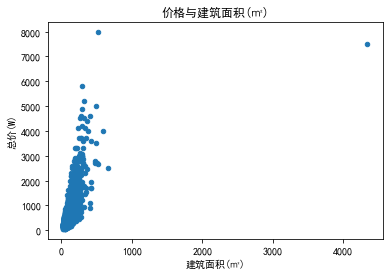

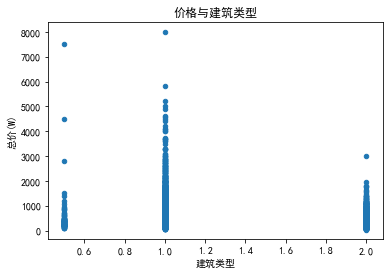

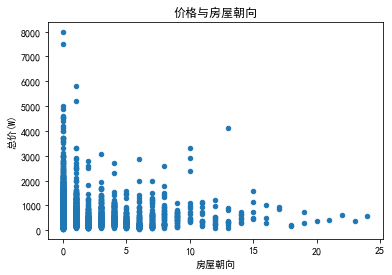

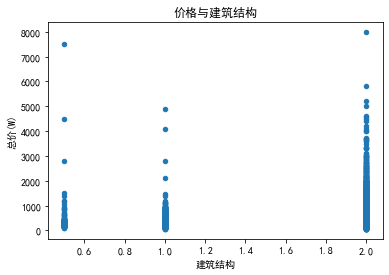

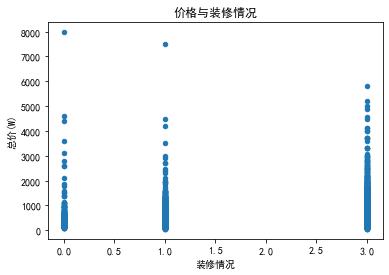

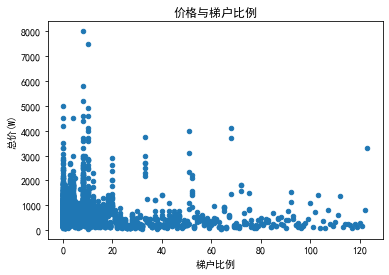

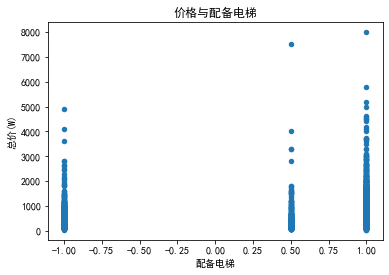

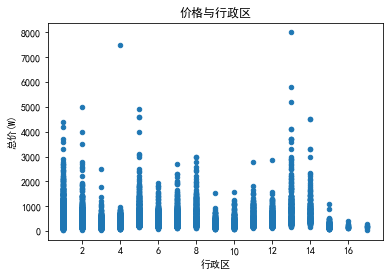

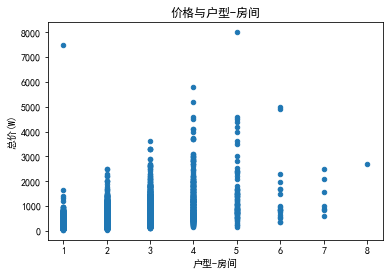

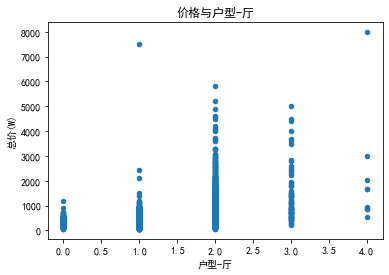

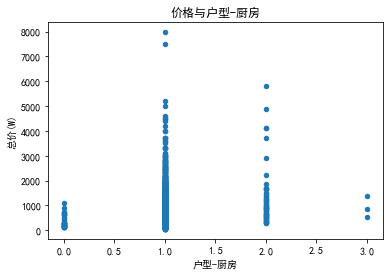

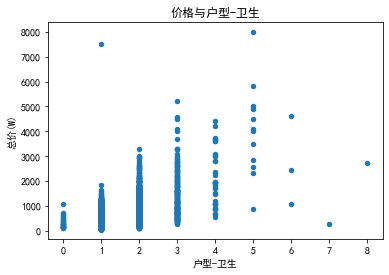

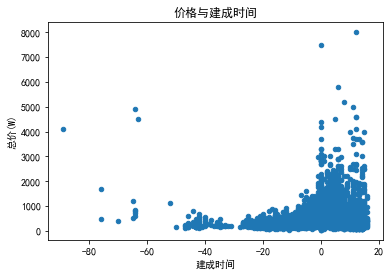

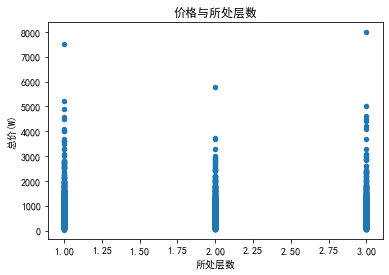

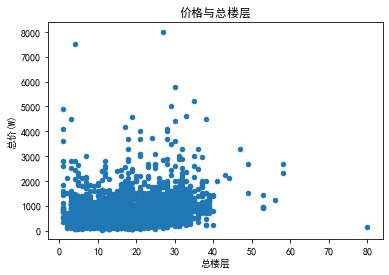

In [107]:
for k in tdata.iloc[:,1:16].columns:
    tdata.plot(kind='scatter',x=k,y='总价(W)',title='价格与'+k)
    plt.xlabel(k)
    plt.ylabel("总价(W)")
    plt.show() 
    #循环画散点图

In [46]:
X=tdata.iloc[:,1:16].astype(float)#1:16是1到15
X.head()#.iloc是按索引访问，记好了

,建筑面积(㎡),建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,配备电梯,行政区,户型-房间,户型-厅,户型-厨房,户型-卫生,建成时间,所处层数,总楼层
0,89.00,1.0,1.0,1.0,3.0,0.0,-1.0,3.0,2.0,2.0,1.0,1.0,-1.0,3.0,6.0
1,75.23,1.0,0.0,2.0,3.0,0.0,-1.0,9.0,2.0,2.0,1.0,1.0,5.0,3.0,5.0
2,129.49,1.0,0.0,2.0,0.0,0.0,-1.0,1.0,3.0,2.0,1.0,2.0,5.0,3.0,6.0
3,78.00,1.0,1.0,1.0,1.0,1.0,-1.0,4.0,3.0,1.0,1.0,1.0,-5.0,1.0,6.0
4,86.32,1.0,1.0,2.0,1.0,3.0,1.0,10.0,2.0,2.0,1.0,1.0,10.0,2.0,18.0


In [38]:
y=tdata.iloc[:,0].astype(float)
y.head()

0    275.0
1    310.0
2    405.0
3    370.0
4    210.0
Name: 总价(W), dtype: float64

In [39]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
from sklearn.linear_model import LinearRegression
hplinreg = LinearRegression()
hplinreg.fit(X_train, y_train)
print ('截距为：',hplinreg.intercept_)
print ('系数为：', hplinreg.coef_)

截距为： -273.40114197592106
系数为： [   2.53466997 -136.91979371   -1.98448702   19.29804934   27.60013302
   -0.40152873    9.80827882    1.97681526   34.87896882   16.6326151
   24.02930131  223.21256771   -7.02748856   -0.2602342    17.42590585]


In [41]:
#模型拟合测试集
y_pred = hplinreg.predict(X_test)
from sklearn import metrics
#计算MSE
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
#算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 59008.27596888275
RMSE: 242.91619124480516


好像过拟合了，算了不管了

In [42]:
tdata.to_excel('trainHousePrize.xlsx')